## Time - Series Forecasting

#### Build a model to forecast the demand(passenger traffic) in Airplanes. The data is classified in date/time and the passengers travelling each month

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
ap = pd.read_csv("airpassengers.csv")
ap['Month'] = pd.to_datetime(ap['Month'], infer_datetime_format = True)
indexap = ap.set_index(['Month'])
indexap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


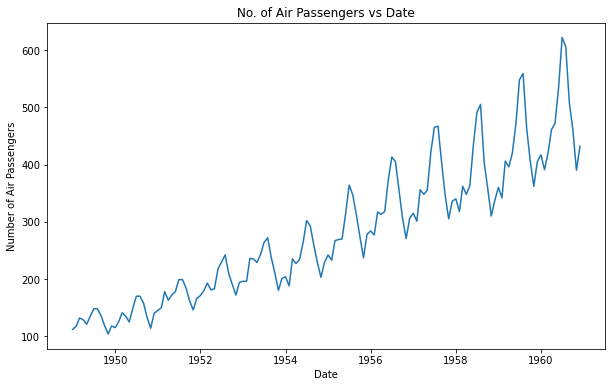

In [3]:
# Plotting graphs
plt.title('No. of Air Passengers vs Date')
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')
plt.plot(indexap)

In [4]:
# Lets formulate rolling statistics

roll_mean = indexap.rolling(window = 12).mean()
roll_std = indexap.rolling(window = 12).std()
print(roll_mean, roll_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


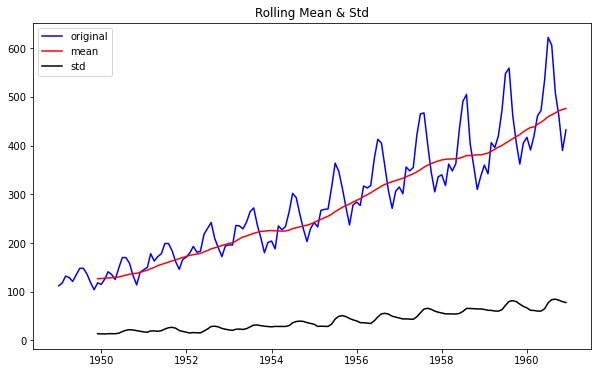

In [5]:
# Plot Rolling Statistics

og = plt.plot(indexap, color = 'blue', label = 'original')
mean = plt.plot(roll_mean, color = 'red', label = 'mean')
std = plt.plot(roll_std, color = 'black', label = 'std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Std')
plt.show()

In [6]:
# Perform Dickey Fuller Test:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey Fuller Test')

dftest = adfuller(indexap['#Passengers'], autolag = 'AIC')
dftest


Result of Dickey Fuller Test


(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [7]:
print('Result of Dickey Fuller Test')
dfoutput = pd.Series(dftest[0:4], index  = ['Test Statistic', 'p-value', '#Lags Used', 'No.of Observations Used'])
for a, b in dftest[4].items():
    dfoutput['Critical values (%s)'%a] = b
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic               0.815369
p-value                      0.991880
#Lags Used                  13.000000
No.of Observations Used    130.000000
Critical values (1%)        -3.481682
Critical values (5%)        -2.884042
Critical values (10%)       -2.578770
dtype: float64


In [8]:
# P value is very high here and we cannot reject Null Hypothesis that the Time Series is not Stationary.

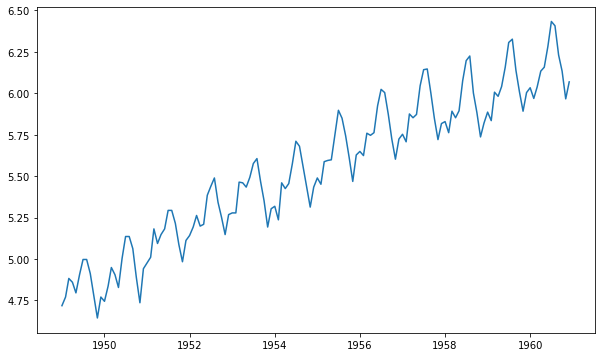

In [9]:
# Estimating Trend
logap = np.log(indexap)
plt.plot(logap)

In [10]:
logap

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


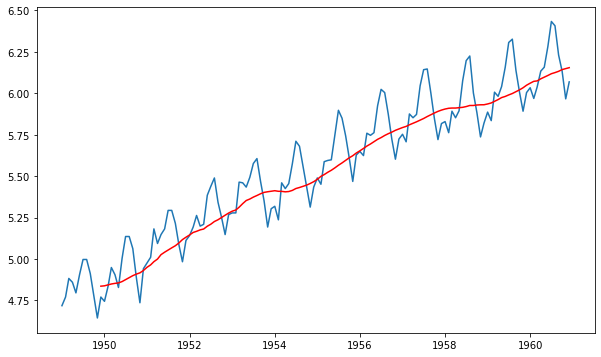

In [11]:
# Lets look at moving average with a log time series.

movingavg = logap.rolling(window = 12).mean()
movingstd = logap.rolling(window = 12).std()
plt.plot(logap)
plt.plot(movingavg, color = 'red')

In [12]:
## Scenario with subtracting simple mean

logap_minus_movingavg = logap - movingavg
logap_minus_movingavg.head(12)

# Removing NAN

logap_minus_movingavg.dropna(inplace = True)
logap_minus_movingavg.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [13]:
# Lets define a function to Perform Rolling Statistics and ADFC in one go:

def stationary_testing(timeseries):
    
    #Rolling Statistics
    movingavg = timeseries.rolling(window = 12).mean()
    movingstd = timeseries.rolling(window = 12).std()
    
    #Plotting Rolling Stats
    plt.plot(timeseries, label = 'original')
    plt.plot(movingavg, color = 'red', label = 'average')
    plt.plot(movingstd, color = 'black', label = 'std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Dickey-Fuller Test
    print('Result of Dickey Fuller Test')
    dftest = adfuller(timeseries['#Passengers'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index  = ['Test Statistic', 'p-value', '#Lags Used', 'No.of Observations Used'])
    for a, b in dftest[4].items():
        dfoutput['Critical values (%s)'%a] = b
    print(dfoutput)

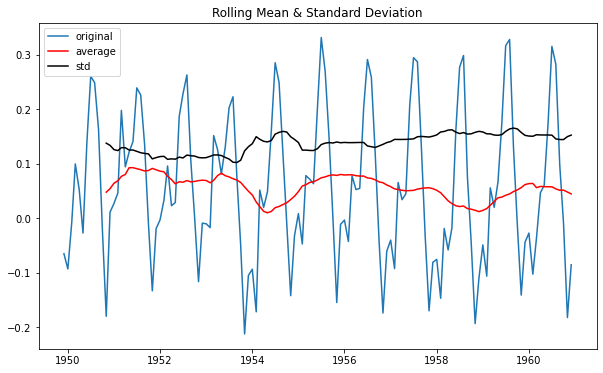

Result of Dickey Fuller Test
Test Statistic              -3.162908
p-value                      0.022235
#Lags Used                  13.000000
No.of Observations Used    119.000000
Critical values (1%)        -3.486535
Critical values (5%)        -2.886151
Critical values (10%)       -2.579896
dtype: float64


In [14]:
stationary_testing(logap_minus_movingavg)

In [15]:
# p - value is very low.
# critical-value ~ Test-Statistic

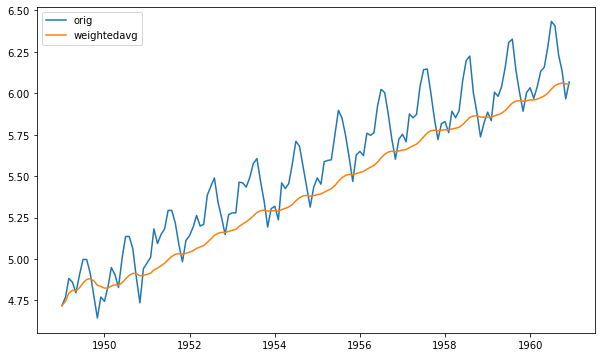

In [16]:
# Scenario with subtracting weighted mean

weightedavg = logap.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(logap, label = 'orig')
plt.plot(weightedavg, label = 'weightedavg')
plt.legend(loc = 'best')

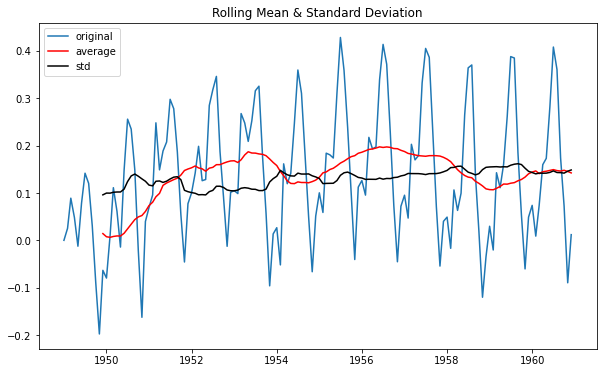

Result of Dickey Fuller Test
Test Statistic              -3.601262
p-value                      0.005737
#Lags Used                  13.000000
No.of Observations Used    130.000000
Critical values (1%)        -3.481682
Critical values (5%)        -2.884042
Critical values (10%)       -2.578770
dtype: float64


In [17]:
logap_minus_weightedavg = logap - weightedavg
stationary_testing(logap_minus_weightedavg)

In [18]:
## More better p- value

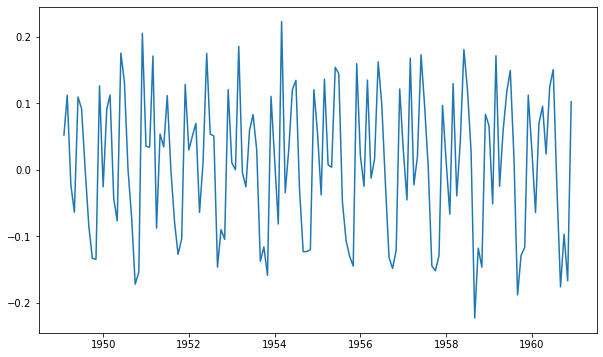

In [19]:
## Shifting Values
logap_shift = logap - logap.shift()
plt.plot(logap_shift)

#This means that we have differentiated by 1

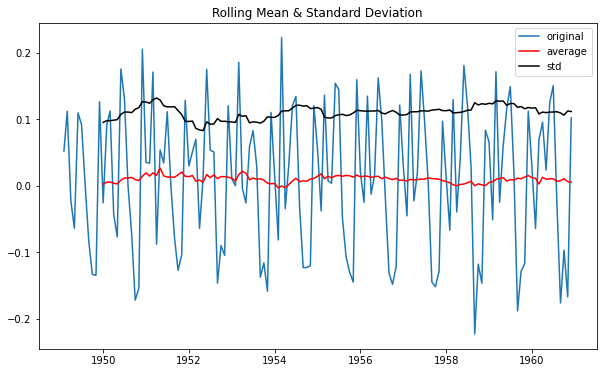

Result of Dickey Fuller Test
Test Statistic              -2.717131
p-value                      0.071121
#Lags Used                  14.000000
No.of Observations Used    128.000000
Critical values (1%)        -3.482501
Critical values (5%)        -2.884398
Critical values (10%)       -2.578960
dtype: float64


In [20]:
logap_shift.dropna(inplace = True)
stationary_testing(logap_shift)

In [21]:
# This means that the time-series is stationary

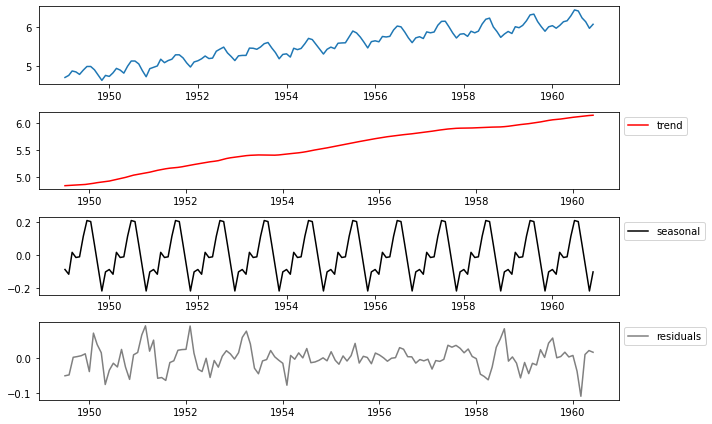

In [22]:
# Components of Time-Series
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(logap)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(logap, label = 'original')
plt.subplot(412)
plt.plot(trend, color = 'red', label = 'trend')
plt.legend(bbox_to_anchor =(1, 1))
plt.subplot(413)
plt.plot(seasonal,color = 'black', label = 'seasonal')
plt.legend(bbox_to_anchor =(1, 1))
plt.subplot(414)
plt.plot(residual,color = 'grey', label = 'residuals')
plt.legend(bbox_to_anchor =(1, 1))
plt.tight_layout()


In [23]:
# Checking noise using Residual
decomplogap = pd.DataFrame(residual)
decomplogap.dropna(inplace = True)
decomplogap = decomplogap.rename(columns = {'resid' : '#Passengers'})

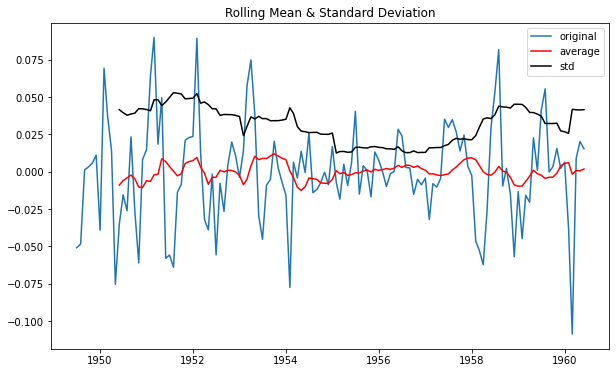

Result of Dickey Fuller Test
Test Statistic            -6.332387e+00
p-value                    2.885059e-08
#Lags Used                 9.000000e+00
No.of Observations Used    1.220000e+02
Critical values (1%)      -3.485122e+00
Critical values (5%)      -2.885538e+00
Critical values (10%)     -2.579569e+00
dtype: float64


In [24]:
stationary_testing(decomplogap)

In [25]:
#Plotting of ACF and PACF graphs to find values of P and Q for ARIMA

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(logap_shift, nlags = 20)
lag_pacf = pacf(logap_shift, nlags = 20, method = 'ols')

Text(0.5, 1.0, 'Partial Autocorrelation')

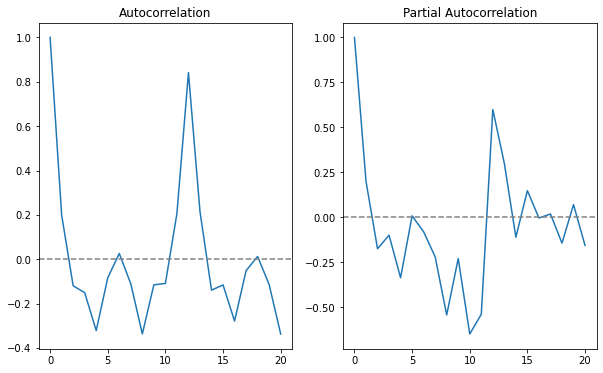

In [26]:
#ACF Plot

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.title('Autocorrelation')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation')

# look for the values on x axis when it cuts y = 0 line.


In [55]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: 2.1398')

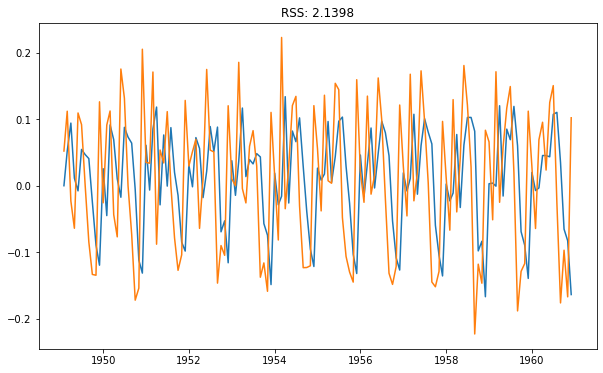

In [57]:
# AR Model
model = ARIMA(logap_shift, order=(2,1,0))
results_AR = model.fit()
plt.plot(results_AR.fittedvalues)
plt.plot(logap_shift['#Passengers'])
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-logap_shift['#Passengers'])**2))

C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: 1.5707')

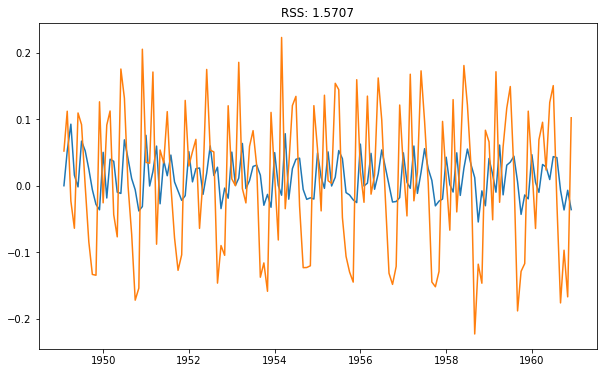

In [58]:
# MA Model
model = ARIMA(logap_shift, order=(0,1,2))
results_MA = model.fit()
plt.plot(results_MA.fittedvalues)
plt.plot(logap_shift['#Passengers'])
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-logap_shift['#Passengers'])**2))

C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 1.5053')

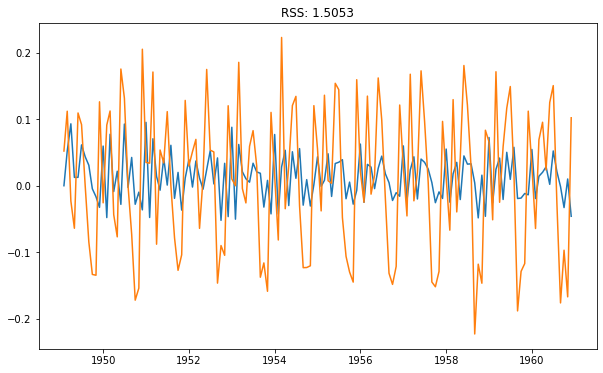

In [59]:
# ARIMA Model
model = ARIMA(logap_shift, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(results_ARIMA.fittedvalues)
plt.plot(logap_shift['#Passengers'])
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-logap_shift['#Passengers'])**2))

C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 1.0198')

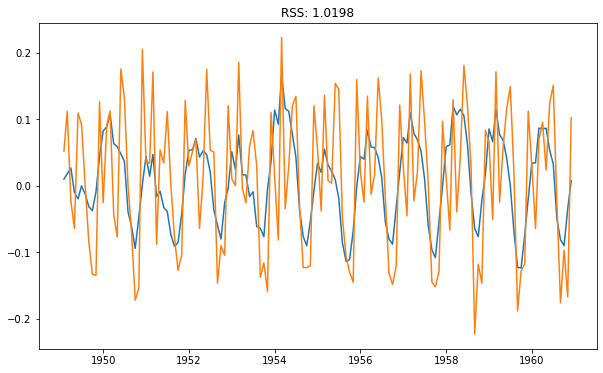

In [77]:
# ARIMA Model
model = ARIMA(logap_shift, order=(3,0,3))
results_ARIMA = model.fit()
plt.plot(results_ARIMA.fittedvalues)
plt.plot(logap_shift['#Passengers'])
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-logap_shift['#Passengers'])**2))

In [78]:
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(pred_ARIMA_diff.head())

Month
1949-02-01    0.009945
1949-03-01    0.017803
1949-04-01    0.026663
1949-05-01   -0.009616
1949-06-01   -0.019819
dtype: float64


In [79]:
# Convert to Cumulative Sum
pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum()
print(pred_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009945
1949-03-01    0.027747
1949-04-01    0.054410
1949-05-01    0.044795
1949-06-01    0.024976
dtype: float64


In [80]:
pred_ARIMA_log = pd.Series(logap['#Passengers'].iloc[0], index = logap.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff_cumsum, fill_value = 0)
print(pred_ARIMA_log.head())

Month
1949-02-01    0.009945
1949-03-01    0.027747
1949-04-01    4.914223
1949-05-01    4.904607
1949-06-01    4.884788
dtype: float64


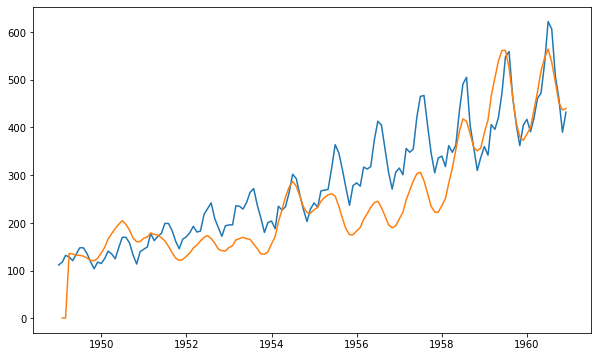

In [82]:
# exponenting it back

pred_ARIMA = pd.DataFrame(np.exp(pred_ARIMA_log))
plt.plot(indexap)
plt.plot(pred_ARIMA)


In [83]:
pred_ARIMA = pred_ARIMA.rename(columns = {0: '#Passengers'})
pred_ARIMA

,#Passengers
Month,
1949-02-01,1.009994
1949-03-01,1.028136
1949-04-01,136.213399
1949-05-01,134.909886
1949-06-01,132.262481
...,...
1960-08-01,536.712805
1960-09-01,494.839989
1960-10-01,452.154998


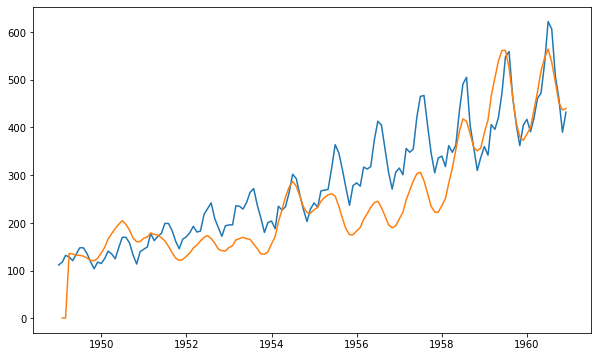

In [84]:
plt.plot(indexap)
plt.plot(pred_ARIMA)


In [92]:
x = results_ARIMA.forecast(steps = 120)

In [101]:
logap['#Passengers'].mean()

5.558165621349233

In [103]:
# Forecasted values
x1 = x + logap['#Passengers'].mean()
x2 = x1.add(x.cumsum())
x3 = np.exp(x2)
print(x3)

1961-01-01     304.514538
1961-02-01     314.229683
1961-03-01     355.537599
1961-04-01     348.498173
1961-05-01     364.631904
                 ...     
1970-08-01     965.397167
1970-09-01     975.065309
1970-10-01     984.796439
1970-11-01     994.656769
1970-12-01    1004.584484
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64
